<a href="https://colab.research.google.com/github/mdraguet/pyVRP/blob/master/Copie_de_pyVRP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# Lesson: pyVRP - CVRP
 
# GitHub Repository: <https://github.com/Valdecy>

In [ ]:
# Build Dir
import os
os.chdir('/content')
CODE_DIR = 'code'

# Clone Github Repository
#!git clone https://github.com/Valdecy/pyVRP.git $CODE_DIR
!git clone https://github.com/mdraguet/pyVRP.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

fatal: destination path 'code' already exists and is not an empty directory.


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np

from google.colab import files # COLAB
from src.pyVRP import  build_coordinates, build_distance_matrix, genetic_algorithm_vrp, plot_tour_coordinates

In [ ]:
# Load Dataset (Optimal Value: 375.28; Distance: Euclidean)
#coordinates = pd.read_csv('https://github.com/Valdecy/Datasets/raw/master/Combinatorial/VRP-01-CVRP-Coordinates.txt', sep = '\t') 
#parameters  = pd.read_csv('https://github.com/Valdecy/Datasets/raw/master/Combinatorial/VRP-01-CVRP-Parameters.txt',  sep = '\t') 
#coordinates = pd.read_csv('C:/Users/marti/Documents/GitHub/Urbike_classified/vrp/coordinates/december/coordinates_2021_01_12.csv', sep=',')
#parameters = pd.read_csv('C:/Users/marti/Documents/GitHub/Urbike_classified/vrp/parameters/december/parameters_2021_01_12.csv', sep=',')
coordinates = pd.read_csv('https://raw.githubusercontent.com/mdraguet/Datasets/master/Combinatorial/coordinates_2021_01_12.csv', delimiter=',', on_bad_lines='skip')
parameters = pd.read_csv('https://raw.githubusercontent.com/mdraguet/Datasets/master/Combinatorial/parameters_2021_01_12.csv', delimiter=',', on_bad_lines='skip')

In [ ]:
# View Coordinates
print(coordinates)

             X         Y
0    50.839092  4.382416
1    50.852735  4.351450
2    50.830776  4.372091
3    50.831459  4.347768
4    50.845140  4.357622
..         ...       ...
204  50.836577  4.387035
205  50.839075  4.361831
206  50.849159  4.350246
207  50.839013  4.363766
208  50.877606  4.366575

[209 rows x 2 columns]


In [ ]:
# View Parameters
parameters

,Demand,TW_early,TW_late,TW_service_time,TW_wait_cost
0,0.0,18:00,21:00,5.0,0.0
1,2.0,16:30,18:00,5.0,0.0
2,1.0,17:10,20:00,5.0,0.0
3,4.0,18:00,19:30,5.0,0.0
4,3.0,10:00,12:00,5.0,0.0
...,...,...,...,...,...
204,1.0,10:00,17:00,5.0,0.0
205,28.0,10:00,17:00,5.0,0.0
206,3.0,10:00,17:00,5.0,0.0
207,3.0,10:00,17:00,5.0,0.0


In [ ]:
# Tranform to Numpy Array
coordinates = coordinates.values
parameters  = parameters.values

In [ ]:
# Build Distance Matrix
distance_matrix = np.genfromtxt('https://raw.githubusercontent.com/mdraguet/Datasets/master/Combinatorial/distance_matrix_2021_01_12.csv', delimiter=' ')
#distance_matrix = np.loadtxt(matrix.all())
#distance_matrix = build_distance_matrix(coordinates)
distance_matrix

array([[0.        , 2.65709292, 1.17681294, ..., 2.52747077, 1.31374007,
        4.42738522],
       [2.65709292, 0.        , 2.84279431, ..., 0.40672934, 1.75577671,
        2.96462418],
       [1.17681294, 2.84279431, 0.        , ..., 2.55929421, 1.08795127,
        5.22415419],
       ...,
       [2.52747077, 0.40672934, 2.55929421, ..., 0.        , 1.4767413 ,
        3.36693107],
       [1.31374007, 1.75577671, 1.08795127, ..., 1.4767413 , 0.        ,
        4.29789687],
       [4.42738522, 2.96462418, 5.22415419, ..., 3.36693107, 4.29789687,
        0.        ]])

In [ ]:
# Parameters - Model
n_depots    =  1           # The First n Rows of the 'distance_matrix' or 'coordinates' are Considered as Depots
time_window = 'without'    # 'with', 'without'
route       = 'closed'     # 'open', 'closed'
model       = 'vrp'        # 'tsp', 'mtsp', 'vrp'
graph       = False        # True, False

# Parameters - Vehicle
vehicle_types =   1        # Quantity of Vehicle Types
fixed_cost    = [ 0  ]     # Fixed Cost
variable_cost = [ 1  ]     # Variable Cost 
capacity      = [6000]     # Capacity of the Vehicle 
velocity      = [ 1  ]     # The Average Velocity Value is Used as a Constant that Divides the Distance Matrix.
fleet_size    = [ 20  ]     # Available Vehicles

# Parameters - GA
penalty_value   = 1000     # GA Target Function Penalty Value for Violating the Problem Constraints
population_size = 75       # GA Population Size
mutation_rate   = 0.10     # GA Mutation Rate
elite           = 1        # GA Elite Member(s) - Total Number of Best Individual(s) that (is)are Maintained 
generations     = 1     # GA Number of Generations

In [ ]:
# Run GA Function
ga_report, ga_vrp = genetic_algorithm_vrp(coordinates, distance_matrix, parameters, velocity, fixed_cost, variable_cost, capacity, population_size, vehicle_types, n_depots, route, model, time_window, fleet_size, mutation_rate, elite, generations, penalty_value, graph)


Generation =  0  Distance =  714.49  f(x) =  714.49
Generation =  1  Distance =  714.49  f(x) =  714.49


TypeError: ignored

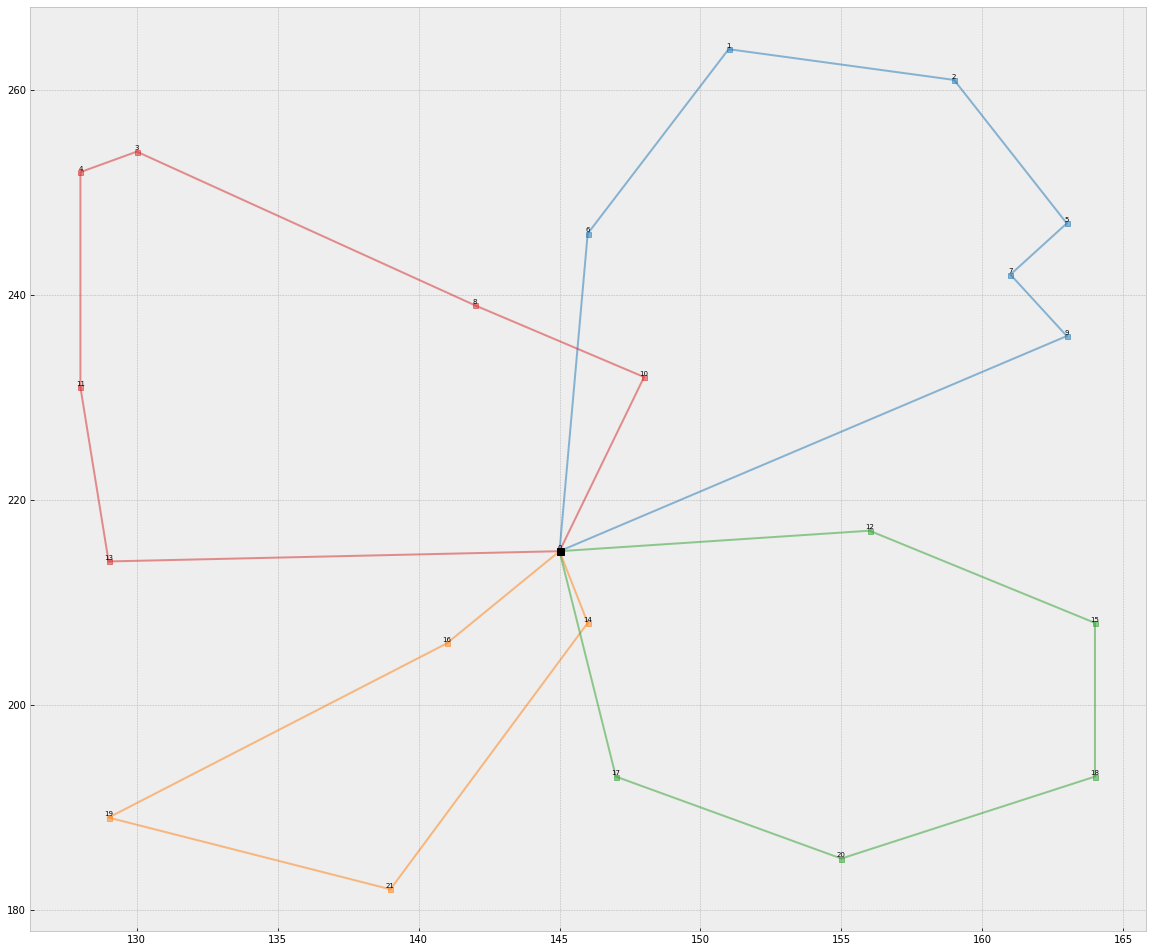

In [ ]:
# Plot Solution
plot_tour_coordinates(coordinates, ga_vrp, n_depots = n_depots, route = route, size_x = 20, size_y = 17)

In [ ]:
# Solution Report
ga_report

,Route,Vehicle,Activity,Job,Arrive_Load,Leave_Load,Wait_Time,Arrive_Time,Leave_Time,Distance,Costs
0,#1,0,start,0,5600,5600,0,0,0,0,0
1,#1,0,service,6,5600,5200,0,31.02,31.02,31.02,31.02
2,#1,0,service,1,5200,4100,0,49.7,49.7,49.7,49.7
3,#1,0,service,2,4100,3400,0,58.24,58.24,58.24,58.24
4,#1,0,service,5,3400,1300,0,72.8,72.8,72.8,72.8
5,#1,0,service,7,1300,500,0,78.19,78.19,78.19,78.19
6,#1,0,service,9,500,0,0,84.51,84.51,84.51,84.51
7,#1,0,finish,0,0,0,0,112.17,112.17,112.17,112.17
8,-//-,-//-,-//-,-//-,-//-,-//-,-//-,-//-,-//-,-//-,-//-
9,#2,0,start,0,5600,5600,0,0,0,0,0


In [ ]:
# Solution Report - Save
ga_report.to_csv('VRP-01-Report.csv', sep = ';', index = False)

In [ ]:
# Solution Report - Download
files.download('VRP-01-Report.csv')